In [244]:
# lien de la compétition Kaggle : https://www.kaggle.com/competitions/store-sales-time-series-forecasting/overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

/Users/melanieyakoub/anaconda3/envs/Projet_CO2_Melanie/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [246]:
train = pd.read_csv(r"./data/train.csv")
test = pd.read_csv(r"./data/test.csv")
transaction = pd.read_csv(r"./data/transactions.csv")
stores = pd.read_csv(r"./data/stores.csv")
oil = pd.read_csv(r"./data/oil.csv")
holidays_events = pd.read_csv(r"./data/holidays_events.csv")

# Analyse descriptives

In [247]:
liste_des_df = {"train":train, "test":test, "transaction":transaction, "stores":stores, "oil":oil, "holidays_events":holidays_events}

In [248]:
for col in liste_des_df.keys():
    print(col, liste_des_df[col].shape)

train (3000888, 6)
test (28512, 5)
transaction (83488, 3)
stores (54, 5)
oil (1218, 2)
holidays_events (350, 6)


## Evlauer le pourcentage de valeurs manquantes pour chaque dataframe

### Pour la dataframe train

In [249]:
missing_percentages_train = train.isnull().mean() * 100
print(missing_percentages_train)
# sales : 
# date :
# family : famille de produit 
# store_nbr : total de vente d'une famille de produit 
# 

id             0.0
date           0.0
store_nbr      0.0
family         0.0
sales          0.0
onpromotion    0.0
dtype: float64


### Pour la dataframe transaction

In [250]:
missing_percentages_transaction = transaction.isnull().mean() * 100
print(missing_percentages_transaction)

date            0.0
store_nbr       0.0
transactions    0.0
dtype: float64


### Pour la dataframe oil

In [251]:
missing_percentages_oil = oil.isnull().mean() * 100
print(missing_percentages_oil)

date          0.000000
dcoilwtico    3.530378
dtype: float64


### Pour la dataframe stores

In [252]:
missing_percentages_stores = stores.isnull().mean() * 100
print(missing_percentages_stores)

store_nbr    0.0
city         0.0
state        0.0
type         0.0
cluster      0.0
dtype: float64


### Pour la dataframe holidays events

In [253]:
missing_percentages_holidays_events = holidays_events.isnull().mean() * 100
print(missing_percentages_holidays_events)

date           0.0
type           0.0
locale         0.0
locale_name    0.0
description    0.0
transferred    0.0
dtype: float64


#### On s'apecoit qu'aucune dataframe n'as de valeurs manquantes sauf la dataframe oil

# Analyse les colonnes catégorielles

## Infos sur la dataframe train

In [254]:
print(train.info()) # la colonne date est en object peut etre vaudrait mieux la transformer en datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None


In [255]:
train['date'] = pd.to_datetime(train['date'])

In [256]:
object_columns_train = train.select_dtypes(include=['object']).columns.tolist()
print(object_columns_train)

['family']


#### Nombre de modalitées de chaque variable catégorielle 

In [257]:
d = {}

for i in object_columns_train:
    d["nombre de modalités "+i] = train[i].nunique()

print(d)

{'nombre de modalités family': 33}


In [258]:
numerique_columns_train = train.select_dtypes(include=['int', "float"]).columns.tolist()
numerique_columns_train.remove("id")
numerique_columns_train.remove("sales")
print(numerique_columns_train)

['store_nbr', 'onpromotion']


In [259]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


## dataframe Oil
### Imputations des valeurs manquantes par la médiane 

In [260]:
oil['date'] = pd.to_datetime(oil['date'])

In [261]:
oil["dcoilwtico"] = oil["dcoilwtico"].fillna(oil["dcoilwtico"].median())

In [262]:
missing_percentages_oil = oil.isnull().mean() * 100
print(missing_percentages_oil)

date          0.0
dcoilwtico    0.0
dtype: float64


In [263]:
oil["date"].nunique()

1218

## Vérification de la linéarité des colonnes continues en fonctions de la variables cible 

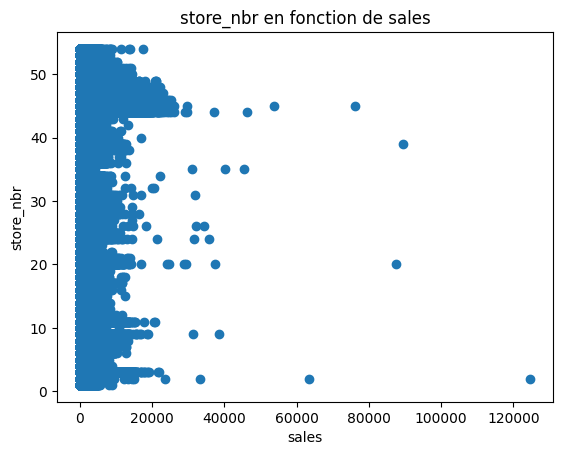

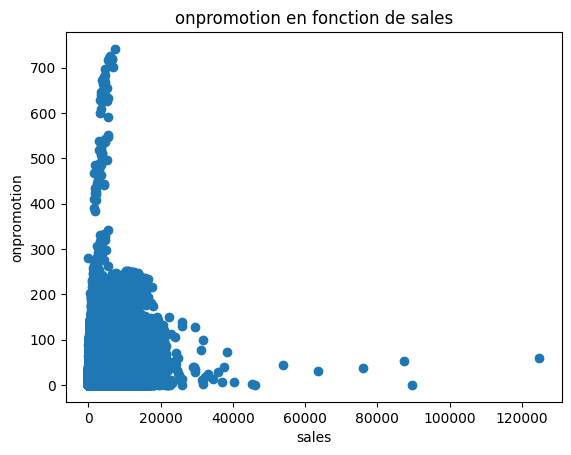

In [292]:
for col in numerique_columns_train:
    plt.title(f"{col} en fonction de sales")
    plt.ylabel(col)
    plt.xlabel("sales")
    plt.scatter(train["sales"],train[col])
    plt.show()

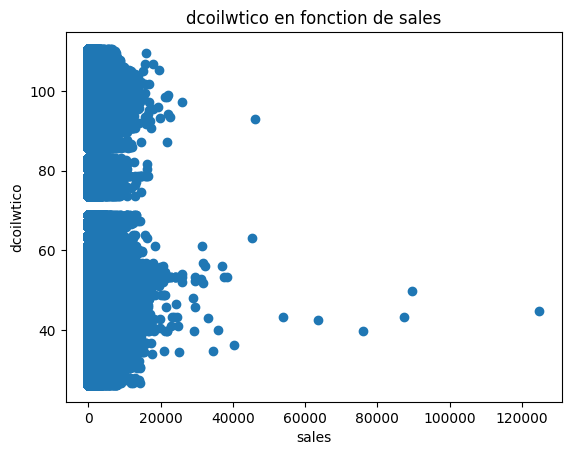

In [293]:
plt.title(f"dcoilwtico en fonction de sales")
plt.ylabel("dcoilwtico")
plt.xlabel("sales")
plt.scatter(train["sales"],train["dcoilwtico"])
plt.show()

## Infos sur la dataframe oil

In [265]:
print(oil.info()) # la colonne date est en object peut etre vaudrait mieux la transformer en datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1218 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB
None


In [266]:
object_columns_train = train.select_dtypes(include=['object']).columns.tolist()
print(object_columns_train)

['family']


# Début du merging des dataframe

In [267]:
train = pd.merge(train, oil, on="date", how="left")
# tout ce qu'il ya dans la table train, et l'intersection entre table train et oil 

In [268]:
train = pd.merge(train, stores, on="store_nbr", how="left")

In [269]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,53.19,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,53.19,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,53.19,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,53.19,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,53.19,Quito,Pichincha,D,13


In [270]:
missing_percentages = train.isnull().mean() * 100
print(missing_percentages)

id              0.000000
date            0.000000
store_nbr       0.000000
family          0.000000
sales           0.000000
onpromotion     0.000000
dcoilwtico     28.562945
city            0.000000
state           0.000000
type            0.000000
cluster         0.000000
dtype: float64


In [271]:
train["dcoilwtico"] = train["dcoilwtico"].fillna(train["dcoilwtico"].median())

# Modèle random forest

In [272]:
object_columns = train.select_dtypes(include=['object']).columns.tolist()
print(object_columns)

['family', 'city', 'state', 'type']


In [273]:
train = pd.get_dummies(train, columns=['family'])
train = pd.get_dummies(train, columns=['city'])
train = pd.get_dummies(train, columns=['state'])
train = pd.get_dummies(train, columns=['type'])

In [274]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Supposons que vous avez déjà un DataFrame df avec vos données

# Séparer les caractéristiques (features) et la variable cible
X = train.drop(['sales','date'], axis=1)  # Features
y = train['sales']  # Target variable

# Diviser l'ensemble de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle de Random Forest pour la régression
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entraîner le modèle sur l'ensemble d'entraînement
random_forest_regressor.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = random_forest_regressor.predict(X_test)

# Calculer l'erreur quadratique moyenne logarithmique (RMSLE) du modèle
rmsle = np.sqrt(np.mean((np.log1p(y_test) - np.log1p(predictions))**2))
print("RMSLE du modèle de Random Forest :", rmsle)


RMSLE du modèle de Random Forest : 0.5368893015715933


# Modèle LGBM

In [275]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [276]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)


In [281]:
print(train_data.feature_name)


['id', 'store_nbr', 'onpromotion', 'dcoilwtico', 'cluster', 'family_AUTOMOTIVE', 'family_BABY CARE', 'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS', 'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING', 'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS', 'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE', 'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II', 'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR', 'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER', 'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE', 'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS', 'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE', 'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD', 'city_Ambato', 'city_Babahoyo', 'city_Cayambe', 'city_Cuenca', 'city_Daule', 'city_El Carmen', 'city_Esmeraldas', 'city_Guaranda', 'city_Guayaquil', 'city_Ibarra', 'city_Latacunga', 'city_Libertad', 'city_Loja', 'city_Mach

In [286]:
# Modifier les noms de caractéristiques pour supprimer les caractères spéciaux
new_feature_names = [col.replace(' ', '_').replace('-', '_').replace('#', '_').replace('%', '_').replace('/', '_').replace(',', '_') for col in train_data.feature_name]

# Créer un nouvel objet Dataset avec les noms de caractéristiques modifiés
train_data_modified = lgb.Dataset(train_data.data, label=train_data.label, feature_name=new_feature_names)

# Vérifier les nouveaux noms de caractéristiques
print(train_data_modified.feature_name)

['id', 'store_nbr', 'onpromotion', 'dcoilwtico', 'cluster', 'family_AUTOMOTIVE', 'family_BABY_CARE', 'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS', 'family_BREAD_BAKERY', 'family_CELEBRATION', 'family_CLEANING', 'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN_FOODS', 'family_GROCERY_I', 'family_GROCERY_II', 'family_HARDWARE', 'family_HOME_AND_KITCHEN_I', 'family_HOME_AND_KITCHEN_II', 'family_HOME_APPLIANCES', 'family_HOME_CARE', 'family_LADIESWEAR', 'family_LAWN_AND_GARDEN', 'family_LINGERIE', 'family_LIQUOR_WINE_BEER', 'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL_CARE', 'family_PET_SUPPLIES', 'family_PLAYERS_AND_ELECTRONICS', 'family_POULTRY', 'family_PREPARED_FOODS', 'family_PRODUCE', 'family_SCHOOL_AND_OFFICE_SUPPLIES', 'family_SEAFOOD', 'city_Ambato', 'city_Babahoyo', 'city_Cayambe', 'city_Cuenca', 'city_Daule', 'city_El_Carmen', 'city_Esmeraldas', 'city_Guaranda', 'city_Guayaquil', 'city_Ibarra', 'city_Latacunga', 'city_Libertad', 'city_Loja', 'city_Mach

In [291]:
params = {
    'objective': 'regression',
    'metric': 'rmse',  # Racine carrée de l'erreur quadratique moyenne
    'num_leaves': 50,  # Nombre maximum de feuilles dans un arbre
    'learning_rate': 0.05,  # Taux d'apprentissage
    'feature_fraction': 0.9,  # Fraction de caractéristiques à utiliser lors de la construction de chaque arbre
    'bagging_fraction': 0.8,  # Fraction de données à utiliser lors de la construction de chaque arbre
    'bagging_freq': 5,  # Fréquence d'utilisation du bagging
    'verbose': 0  # Contrôle le niveau de détails des messages
}

num_round = 100
bst = lgb.train(params, train_data_modified, num_round, valid_sets=[test_data])

# Faites des prédictions sur l'ensemble de test
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Calculez RMSLE
rmsle = np.sqrt(np.mean((np.log1p(y_test) - np.log1p(y_pred))**2))
print('RMSLE:', rmsle)


RMSLE: 2.1685224259155156


C:\Users\JWill\AppData\Local\Temp\ipykernel_15012\3966556263.py:19: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean((np.log1p(y_test) - np.log1p(y_pred))**2))


In [241]:
train.head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,cluster,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,...,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_A,type_B,type_C,type_D,type_E
0,0,2013-01-01,1,0.0,0,53.19,13,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,1,2013-01-01,1,0.0,0,53.19,13,False,True,False,...,False,True,False,False,False,False,False,False,True,False
2,2,2013-01-01,1,0.0,0,53.19,13,False,False,True,...,False,True,False,False,False,False,False,False,True,False
3,3,2013-01-01,1,0.0,0,53.19,13,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,4,2013-01-01,1,0.0,0,53.19,13,False,False,False,...,False,True,False,False,False,False,False,False,True,False


# Entrainenement sur la Base test

In [225]:
test['date'] = pd.to_datetime(test['date'])

In [226]:
test = pd.merge(test, oil, on="date", how="left")
test = pd.merge(test, stores, on="store_nbr", how="left")

In [227]:
test = pd.get_dummies(test, columns=['family'])
test = pd.get_dummies(test, columns=['city'])
test = pd.get_dummies(test, columns=['state'])
test = pd.get_dummies(test, columns=['type'])

In [228]:
test.drop(["date"], axis=1, inplace=True)

predictions = random_forest_regressor.predict(test)

# Afficher les prédictions
print(predictions)

[   3.71          0.            7.35       ... 1229.48193     124.49
   18.42417998]


In [229]:
print(len(predictions))

28512


In [230]:
sub = {"id":test["id"], "sales":predictions}

In [231]:
submission = pd.DataFrame(sub)
submission

,id,sales
0,3000888,3.71000
1,3000889,0.00000
2,3000890,7.35000
3,3000891,2105.79000
4,3000892,0.08000
...,...,...
28507,3029395,360.60739
28508,3029396,98.82575
28509,3029397,1229.48193
28510,3029398,124.49000


In [232]:
submission.to_csv(r"./data/submissions.csv", index=False)